# Solução numérica de EDOs

In [1]:
%matplotlib inline 
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt

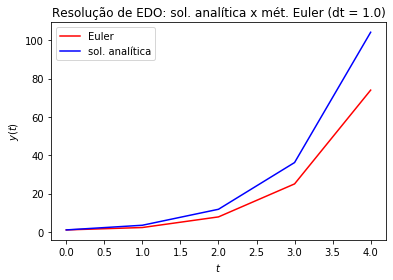

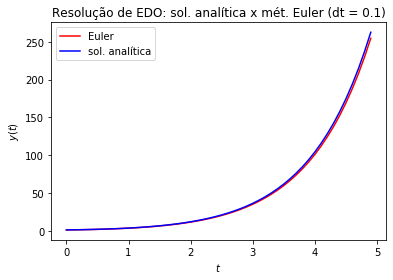

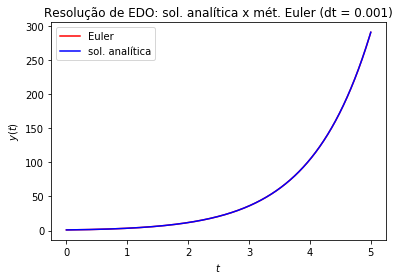

In [2]:
# Define função f(t,y) = -2yt 
# para resolver o PVI 
# y' = -2yt
# y(0) = 1, (0,2]

#f = lambda t,y: -2*y*t
#yan = lambda t: np.exp(-t**2)

f = lambda t,y: y + t
yan = lambda t: 2*np.exp(t) - t - 1

y0 = 1
a = 0.0
b = 5.0
T = [1.0,0.1,0.001]

for k in T:
    
    t = np.arange(a, b, k)
    y = odeint(f, y0, t)

    y2 = y*0
    y2[0] = y0
    dt = (b-a)/ (len(t)-1)
    for i in range(0,len(t)-1):
        y2[i+1] = y2[i] + f(t[i],y[i])*dt
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #plt.plot(t,y,'k',label='odeint')
    plt.plot(t,y2,'r',label='Euler')
    plt.plot(t,yan(t),'b',label='sol. analítica')
    plt.legend()
    s = 'Resolução de EDO: sol. analítica x mét. Euler (dt = ' + str(k) + ')' 
    plt.title(s)
    plt.xlabel('$t$') 
    plt.ylabel('$y(t)$')



y**2*(sin(10) - 10*cos(10))


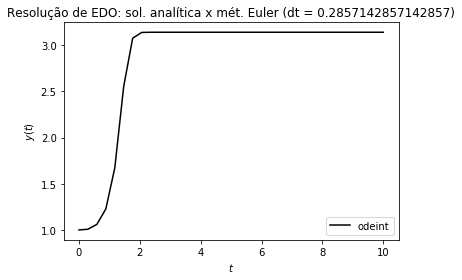

In [3]:
%matplotlib inline 
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt
from sympy import Symbol, integrate, sin, cos

# PVI 
# y' = f(T,y)
# y(t0) = 1, T = (t0,tn]

# parametros
t0 = 0
tn = 10
nt = 35
y0_ex2 = 1

# var. independente
T = np.linspace(t0,tn,nt)

# EDO
f_ex2 = lambda t,y: y**2*t*(np.sin(t))

# solucao analitica simbolica 
fun = 'y**2*t*(sin(t))'
tt = Symbol('t')
yan_ex2 = integrate(fun,(tt,t0,tn))
print(yan_ex2)

yan = yan_ex2.subs(t,T)

y_ex2 = odeint(f_ex2, y0_ex2, T)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(T,y_ex2,'k',label='odeint')
plt.legend()
s = 'Resolução de EDO: sol. analítica x mét. Euler (dt = ' + str((tn-t0)/nt) + ')' 
plt.title(s)
plt.xlabel('$t$'); 
plt.ylabel('$y(t)$');